#Introduction

Today we are going to use pandas and seaborn to
  * Create histograms and Boxplots
  * Compute the mean, median, standard deviation and 5-number summary. 
  * Identify outliers and "censor" them if approporiate. (which it usually isn't)

  As always, we begin by importing packages and our addhealth data set. (I did it a little differently this time) 

For this activity, we will look at two variables 'H4GH6' and 'H4ID6I'. Reference the [codebook](https://drive.google.com/file/d/128AN5t3RBeVwbFx-V-gI6x6qt4FHHUA5/view?usp=sharing) for more information. 

# Header Block

In [2]:
# This header will be the same no matter what code you are using
# import modules that we will use multiple functions from and give them short names. 

import pandas as pd;
import numpy as np;
import seaborn as sb;
import matplotlib.pyplot as plt;


# import single functions

from scipy.stats.contingency import chi2_contingency;
from itertools import combinations;
from statsmodels.graphics.mosaicplot import mosaic;
from scipy.stats.contingency import chi2_contingency;
from scipy.stats import pearsonr;

We begin our data management by renaming the variables to something that is easier to remember and work with. 

# Data Management

In [4]:
# This is the URL to a copy of the ADD Health Wave IV Data

addhealth_url = 'https://drive.google.com/uc?export=download&id=1LOoZl4utpqTfKjj6nu70RH16frFLyPfm'

myData = pd.read_csv(addhealth_url, usecols=['H4GH6','H4ID6I'],low_memory=False)

# Rename the variables

myData.rename(columns={
    'H4ID6I':'ptsd_diag_age',
    'H4GH6':'current_weight'
},inplace=True)

# Deal with non-responses and legitamite skips

myData['current_weight'].replace({
    996:np.nan,
    998:np.nan,
},inplace=True)

# Everything else

I like to look at some examples of the responses to make sure that my renaming worked and that the data makes sense. 

In [5]:
myData.head(15)

,current_weight,ptsd_diag_age
0,238.0,97
1,235.0,97
2,145.0,97
3,200.0,97
4,325.0,97
5,225.0,97
6,125.0,97
7,130.0,97
8,213.0,97
9,221.0,97


<AxesSubplot:xlabel='current_weight', ylabel='Count'>

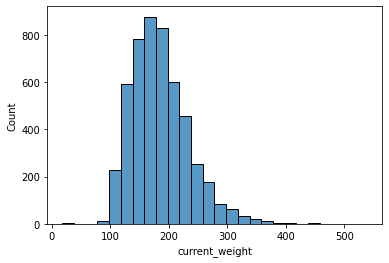

In [7]:
sb.histplot(data=myData,binwidth=20, x='current_weight')

Many times we like to layer a "density curve" to helps us identify the shape of the data. We do so by adding the kde=True argument. 

<AxesSubplot:xlabel='current_weight', ylabel='Count'>

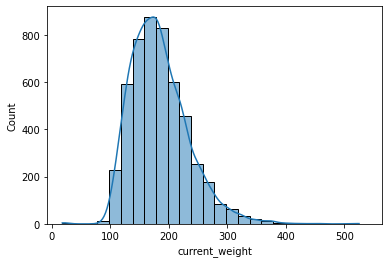

In [9]:
sb.histplot(data=myData,binwidth=20, x='current_weight', kde=True)

All of the summary statistics are generated using the .describe command. The Q1 is listed as 25%, the median as 50% and the Q3 as 75%. 

In [10]:
myData['current_weight'].describe()

count    5035.000000
mean      184.050050
std        49.337308
min        18.000000
25%       150.000000
50%       178.000000
75%       211.000000
max       525.000000
Name: current_weight, dtype: float64

We can create a boxplot using the boxplot command. The whis= argument sets how many times the IQR we go to define the upper and lower fences. For our class we will use the 1.5*IQR rule. 

<AxesSubplot:xlabel='current_weight'>

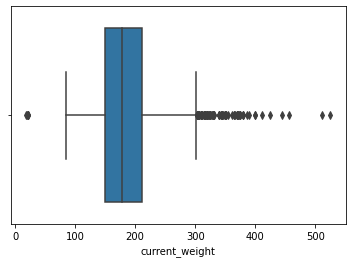

In [11]:
sb.boxplot(data=myData,whis=1.5, x='current_weight')

Sometimes I would like to seperate the outliers from the rest of the data. To do this I will compute the upper and lower fences like we did in class. 

In [12]:
q1 = myData['current_weight'].quantile(0.25)
q3 = myData['current_weight'].quantile(0.75)

iqr = q3-q1
uf = q3 + 1.5*iqr
lf = q1 - 1.5*iqr

The command looks at all of the data that exceeds the fences. THe results below are your outlier weights. 

In [13]:
myData[(myData['current_weight'] < lf) | (myData['current_weight'] > uf)]

,current_weight,ptsd_diag_age
4,325.0,97
49,316.0,97
69,380.0,97
124,303.0,97
141,303.0,97
...,...,...
4882,325.0,97
4962,325.0,97
5005,425.0,97
5047,325.0,97


Sometimes (rarely) I would like to delete, or censor the outliers. The command below filters out the responses that are outliers, leaving only non outlier values. 

In [14]:
myData = myData[(myData['current_weight'] >= lf) & (myData['current_weight']<= uf)]

<AxesSubplot:xlabel='current_weight'>

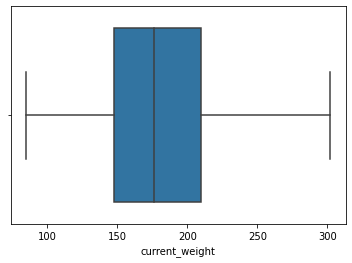

In [15]:
sb.boxplot(data=myData,whis=1.5, x='current_weight')

<AxesSubplot:xlabel='current_weight', ylabel='Count'>

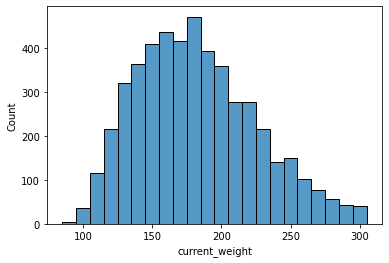

In [16]:
sb.histplot(data=myData,binwidth=10, x='current_weight')